**CLASIFICATION USING LOGISTIC REGRESSION**

In [2]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing classification dataset from preprocessing folder 
data = pd.read_excel('/home/rai/Desktop/ML/ml-project-2022-unicaen/preprocessing/classificationData.xlsx')

In [4]:
data.head()

,id number,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,...,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status,Recurrence
0,119513,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,...,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.000000e+00,0
1,8423,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.000000e+00,0
2,842517,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,...,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,4.440892e-16,0
3,843483,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,4.440892e-16,0
4,843584,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,4.440892e-16,1


This dataset doesn't have time as its variable because time cannot be known in advance. 

In [5]:
#checking missing values
data.isnull().sum()

id number                  0
Mean radius                0
Mean texture               0
Mean perimeter             0
Mean area                  0
Mean smothness             0
Mean compactness           0
Mean concavity             0
Mean concave points        0
Mean symmetry              0
Mean fractal dimension     0
STD radius                 0
STD texture                0
STD perimeter              0
STD area                   0
STD smothness              0
STD compactness            0
STD concavity              0
STD concave points         0
STD symmetry               0
STD fractal dimension      0
Worst radius               0
Worst texture              0
Worst perimeter            0
Worst area                 0
Worst smothness            0
Worst compactness          0
Worst concavity            0
Worst concave points       0
Worst symmetry             0
Worst fractal dimension    0
Tumour Size                0
Lymph node status          0
Recurrence                 0
dtype: int64

Data are already preprocessed, thus, no missing values. 

In [6]:
#LEt scale data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('Recurrence',axis=1))

scaled_features = scaler.transform(data.drop('Recurrence',axis=1))
df = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df.head()


,id number,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,...,Worst perimeter,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status
0,-0.649250,0.192688,1.241770,0.123934,0.122300,-0.623774,-0.784542,-0.676803,-0.480176,-0.228521,...,-0.022477,0.053105,-1.112648,-1.054732,-0.708404,-1.370815,-0.743009,-0.459226,1.113530,0.330401
1,-0.687799,0.183175,-2.774630,0.372418,0.088138,1.258416,2.711439,2.043606,1.785222,1.795777,...,1.535510,1.050496,0.832831,1.837343,1.589132,1.922113,1.823321,1.329259,0.078903,-0.222828
2,-0.398356,1.254939,-1.127953,1.061610,1.147186,-1.146560,-0.477137,-0.436726,-0.147247,1.481536,...,0.650684,0.930741,-1.144541,-0.123520,-0.550192,0.541923,1.467183,-0.007488,-0.179753,-0.591648
3,-0.398021,-1.900104,-0.442226,-1.747667,-1.662423,3.187841,2.838018,1.209726,0.545246,2.446183,...,-1.439240,-1.432374,3.001561,3.064487,1.444778,1.746815,4.540377,3.891002,-0.438410,-0.591648
4,-0.397986,0.912482,-1.850998,0.949089,0.930821,-0.190654,-0.197860,0.593194,0.518612,-0.433143,...,0.411261,0.290905,-0.297096,-0.978914,-0.211827,-0.361191,-1.160505,-0.665207,0.337560,-0.591648


In [7]:
#include target variable in scaled data frame
df['Recurrence'] = data['Recurrence']
df.head()

,id number,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,...,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status,Recurrence
0,-0.649250,0.192688,1.241770,0.123934,0.122300,-0.623774,-0.784542,-0.676803,-0.480176,-0.228521,...,0.053105,-1.112648,-1.054732,-0.708404,-1.370815,-0.743009,-0.459226,1.113530,0.330401,0
1,-0.687799,0.183175,-2.774630,0.372418,0.088138,1.258416,2.711439,2.043606,1.785222,1.795777,...,1.050496,0.832831,1.837343,1.589132,1.922113,1.823321,1.329259,0.078903,-0.222828,0
2,-0.398356,1.254939,-1.127953,1.061610,1.147186,-1.146560,-0.477137,-0.436726,-0.147247,1.481536,...,0.930741,-1.144541,-0.123520,-0.550192,0.541923,1.467183,-0.007488,-0.179753,-0.591648,0
3,-0.398021,-1.900104,-0.442226,-1.747667,-1.662423,3.187841,2.838018,1.209726,0.545246,2.446183,...,-1.432374,3.001561,3.064487,1.444778,1.746815,4.540377,3.891002,-0.438410,-0.591648,0
4,-0.397986,0.912482,-1.850998,0.949089,0.930821,-0.190654,-0.197860,0.593194,0.518612,-0.433143,...,0.290905,-0.297096,-0.978914,-0.211827,-0.361191,-1.160505,-0.665207,0.337560,-0.591648,1


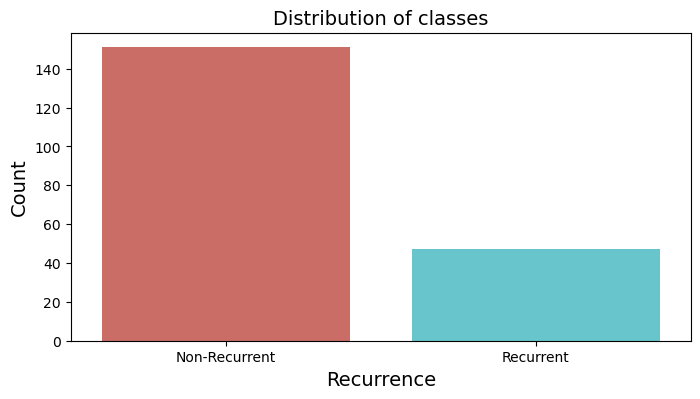

Number of cells labeled Reccurent:  47
Number of cells labeled Non-recurrent :  151

% of cells labeled Recurrent 23.74 %
% of cells labeled Non-Recurrent 76.26 %


In [8]:
# visualize distribution of classes 
plt.figure(figsize=(8, 4))
sns.countplot(x='Recurrence', data=df, palette='hls')
plt.xticks([0, 1], ['Non-Recurrent', 'Recurrent'])
plt.title('Distribution of classes', fontsize=14)
plt.xlabel('Recurrence', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# count number of obvs in each class
rec, nonrec = df['Recurrence'].value_counts()
print('Number of cells labeled Reccurent: ', nonrec)
print('Number of cells labeled Non-recurrent : ', rec)
print('')
print('% of cells labeled Recurrent', round(nonrec / len(df) * 100, 2), '%')
print('% of cells labeled Non-Recurrent', round(rec / len(df) * 100, 2), '%')

/tmp/ipykernel_13466/763902648.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


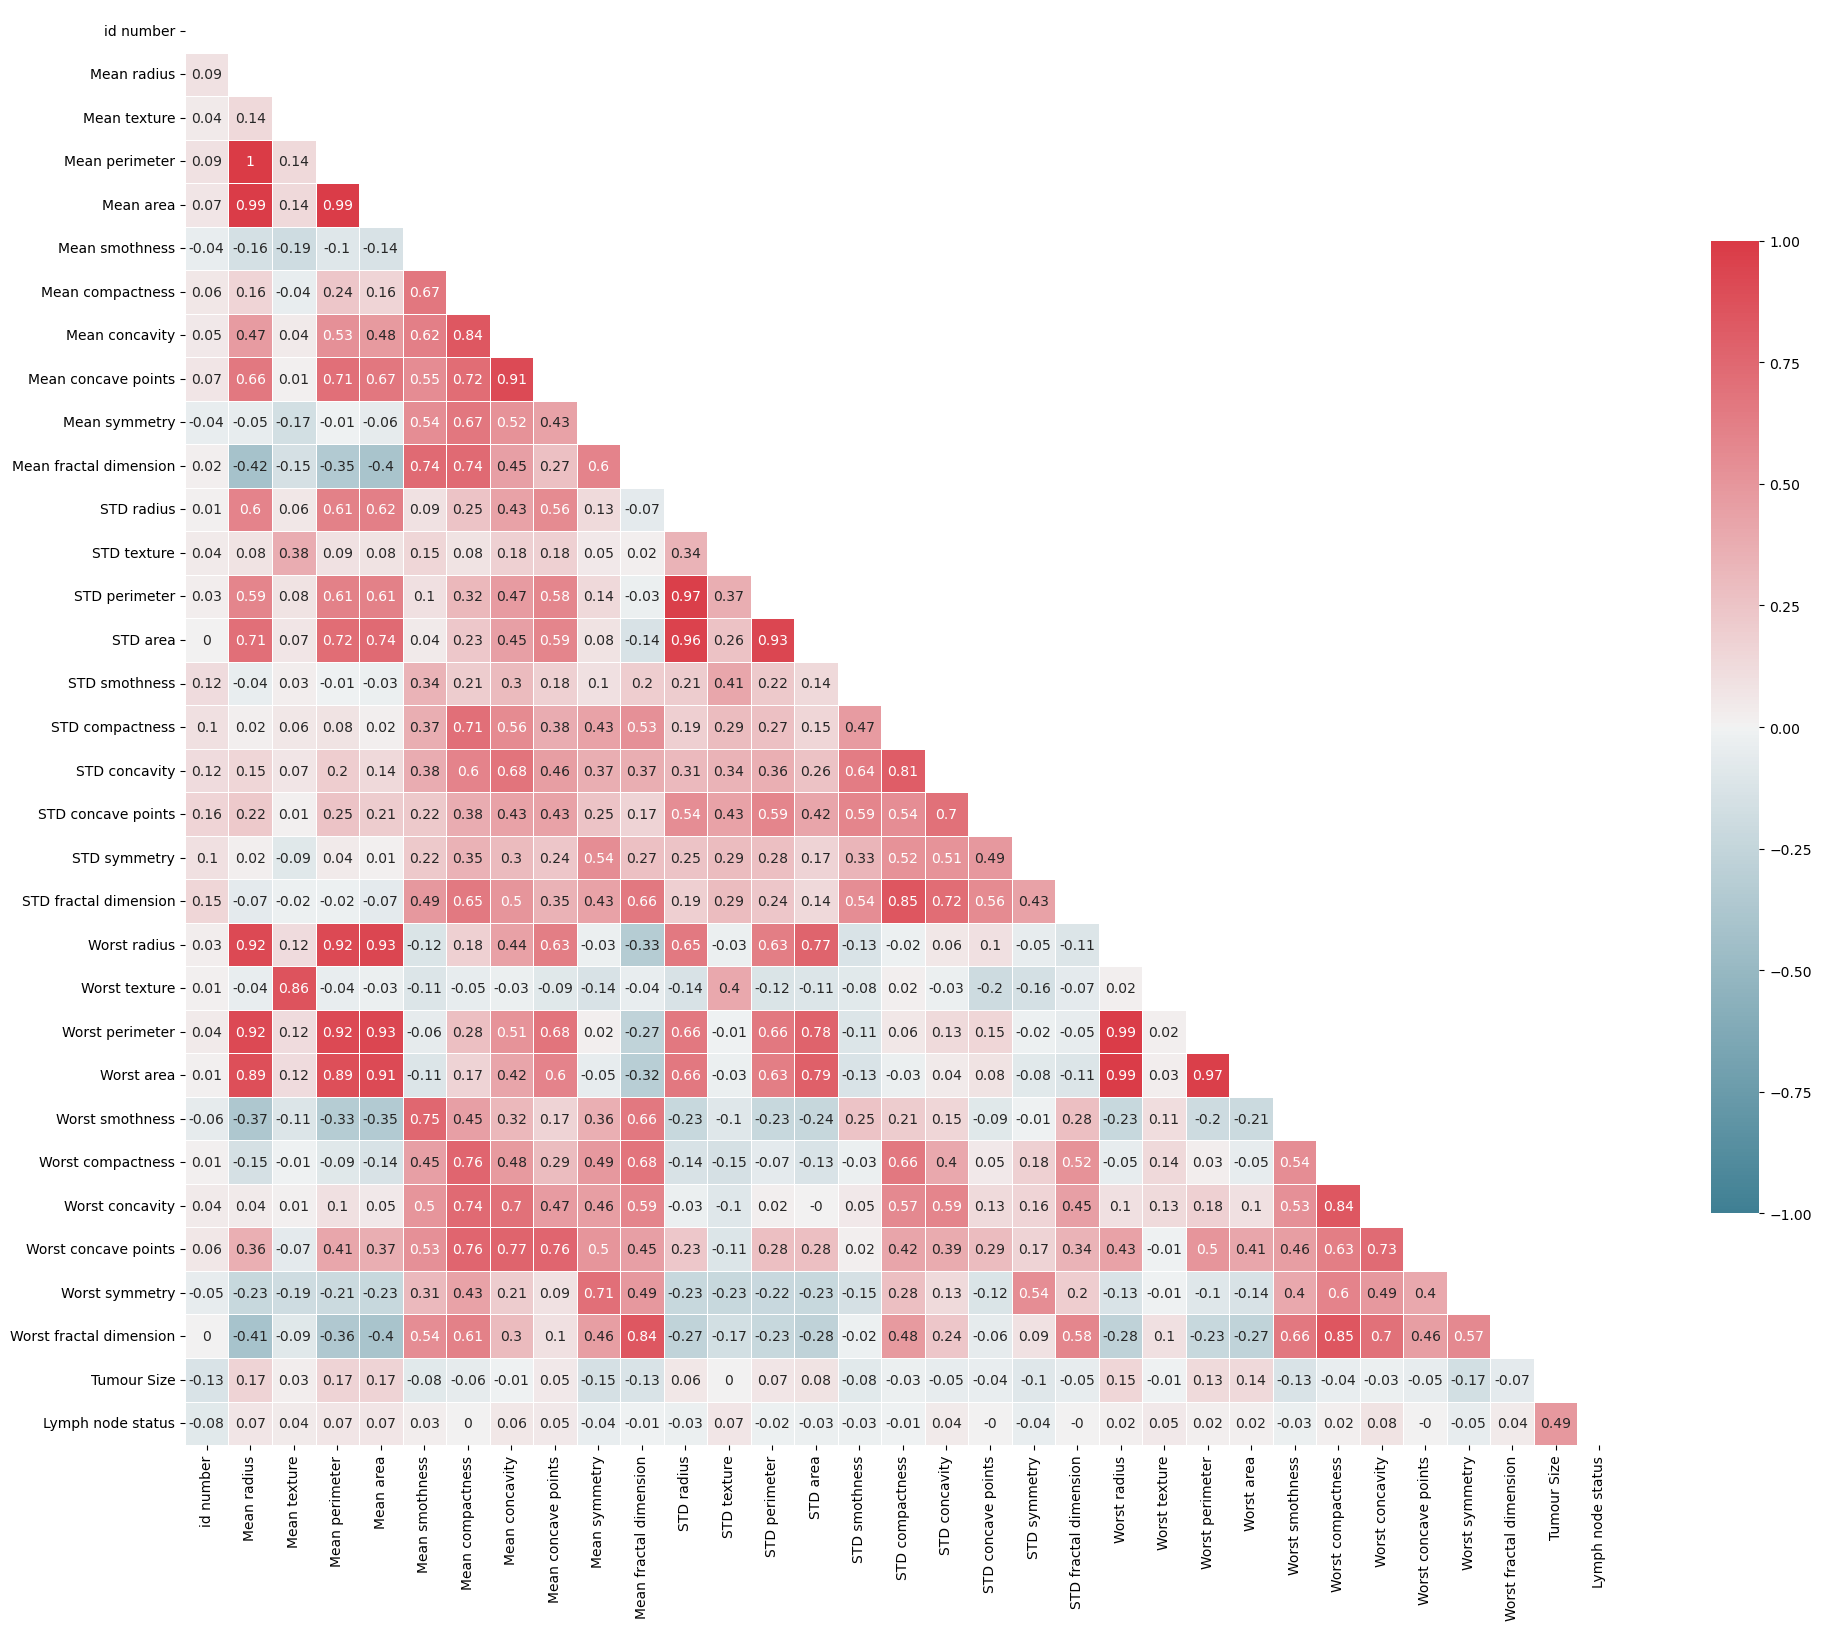

In [9]:
# Generate and visualize the correlation matrix excluding the target variable
corr = df.drop('Recurrence', axis=1).corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

**This step is important because gives us informations about multicolinearity, it is clear that multicollinearity exist between some of our variables. If we consider, the radius_mean column has a correlation of 1 and 0.99 with perimeter_mean and area_mean columns, respectively. This is expected result since we deal with dependent data, i.e. area is expressed in terms of radius. This problem should be solved.**

**We also have multicolinearity comparing wors and mean values. Look at radiuus_mean and radius_worst for instance.**
**Corellation exists between compactness, concavity and concave points**


Well, what is the idea? We will definitely drop all "worst" columns from our dataset, then pick only one of the three attributes that describe the size of cells. But which ones should be pick?

In [10]:
#drop out all 'worst' features
df.drop([ 'Worst radius', 'Worst perimeter','Worst texture', 'Worst area', 'Worst smothness', 'Worst compactness',
'Worst concavity', 'Worst concave points', 'Worst symmetry', 'Worst fractal dimension'], axis=1, inplace=True)
df.head()

,id number,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,...,STD area,STD smothness,STD compactness,STD concavity,STD concave points,STD symmetry,STD fractal dimension,Tumour Size,Lymph node status,Recurrence
0,-0.649250,0.192688,1.241770,0.123934,0.122300,-0.623774,-0.784542,-0.676803,-0.480176,-0.228521,...,0.027606,-0.784988,-0.967037,-0.404488,-0.955358,-0.378360,-0.254484,1.113530,0.330401,0
1,-0.687799,0.183175,-2.774630,0.372418,0.088138,1.258416,2.711439,2.043606,1.785222,1.795777,...,1.737769,-0.122310,1.015500,0.623570,0.140382,0.991743,1.141313,0.078903,-0.222828,0
2,-0.398356,1.254939,-1.127953,1.061610,1.147186,-1.146560,-0.477137,-0.436726,-0.147247,1.481536,...,0.249081,-0.200510,0.187308,-0.372301,0.537443,1.086991,0.544297,-0.179753,-0.591648,0
3,-0.398021,-1.900104,-0.442226,-1.747667,-1.662423,3.187841,2.838018,1.209726,0.545246,2.446183,...,-0.898410,0.791485,2.469247,0.761925,0.650368,4.089914,2.701109,-0.438410,-0.591648,0
4,-0.397986,0.912482,-1.850998,0.949089,0.930821,-0.190654,-0.197860,0.593194,0.518612,-0.433143,...,0.505867,1.593709,-0.375065,0.774896,0.683153,-0.313466,0.583615,0.337560,-0.591648,1


In [11]:
# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['Mean perimeter',
        'STD perimeter', 
        'Mean area', 
        'STD area']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['Mean concavity',
        'STD concavity', 
        'Mean concave points', 
        'STD concave points']
df = df.drop(cols, axis=1)

In [12]:
df.head()

,id number,Mean radius,Mean texture,Mean smothness,Mean compactness,Mean symmetry,Mean fractal dimension,STD radius,STD texture,STD smothness,STD compactness,STD symmetry,STD fractal dimension,Tumour Size,Lymph node status,Recurrence
0,-0.649250,0.192688,1.241770,-0.623774,-0.784542,-0.228521,0.086480,0.069679,1.191216,-0.784988,-0.967037,-0.378360,-0.254484,1.113530,0.330401,0
1,-0.687799,0.183175,-2.774630,1.258416,2.711439,1.795777,2.216313,1.589424,-0.683918,-0.122310,1.015500,0.991743,1.141313,0.078903,-0.222828,0
2,-0.398356,1.254939,-1.127953,-1.146560,-0.477137,1.481536,-0.360812,-0.058018,-1.245297,-0.200510,0.187308,1.086991,0.544297,-0.179753,-0.591648,0
3,-0.398021,-1.900104,-0.442226,3.187841,2.838018,2.446183,4.810056,-0.348324,-0.206518,0.791485,2.469247,4.089914,2.701109,-0.438410,-0.591648,0
4,-0.397986,0.912482,-1.850998,-0.190654,-0.197860,-0.433143,-0.536682,0.497380,-0.920048,1.593709,-0.375065,-0.313466,0.583615,0.337560,-0.591648,1


In [13]:
#drop out id column
df.drop(['id number'], axis=1, inplace=True)
df.head()

,Mean radius,Mean texture,Mean smothness,Mean compactness,Mean symmetry,Mean fractal dimension,STD radius,STD texture,STD smothness,STD compactness,STD symmetry,STD fractal dimension,Tumour Size,Lymph node status,Recurrence
0,0.192688,1.241770,-0.623774,-0.784542,-0.228521,0.086480,0.069679,1.191216,-0.784988,-0.967037,-0.378360,-0.254484,1.113530,0.330401,0
1,0.183175,-2.774630,1.258416,2.711439,1.795777,2.216313,1.589424,-0.683918,-0.122310,1.015500,0.991743,1.141313,0.078903,-0.222828,0
2,1.254939,-1.127953,-1.146560,-0.477137,1.481536,-0.360812,-0.058018,-1.245297,-0.200510,0.187308,1.086991,0.544297,-0.179753,-0.591648,0
3,-1.900104,-0.442226,3.187841,2.838018,2.446183,4.810056,-0.348324,-0.206518,0.791485,2.469247,4.089914,2.701109,-0.438410,-0.591648,0
4,0.912482,-1.850998,-0.190654,-0.197860,-0.433143,-0.536682,0.497380,-0.920048,1.593709,-0.375065,-0.313466,0.583615,0.337560,-0.591648,1


In [14]:
#pint fratures
df.columns

Index(['Mean radius', 'Mean texture', 'Mean smothness', 'Mean compactness',
       'Mean symmetry', 'Mean fractal dimension', 'STD radius', 'STD texture',
       'STD smothness', 'STD compactness', 'STD symmetry',
       'STD fractal dimension', 'Tumour Size', 'Lymph node status',
       'Recurrence'],
      dtype='object')

/tmp/ipykernel_13466/1365417986.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


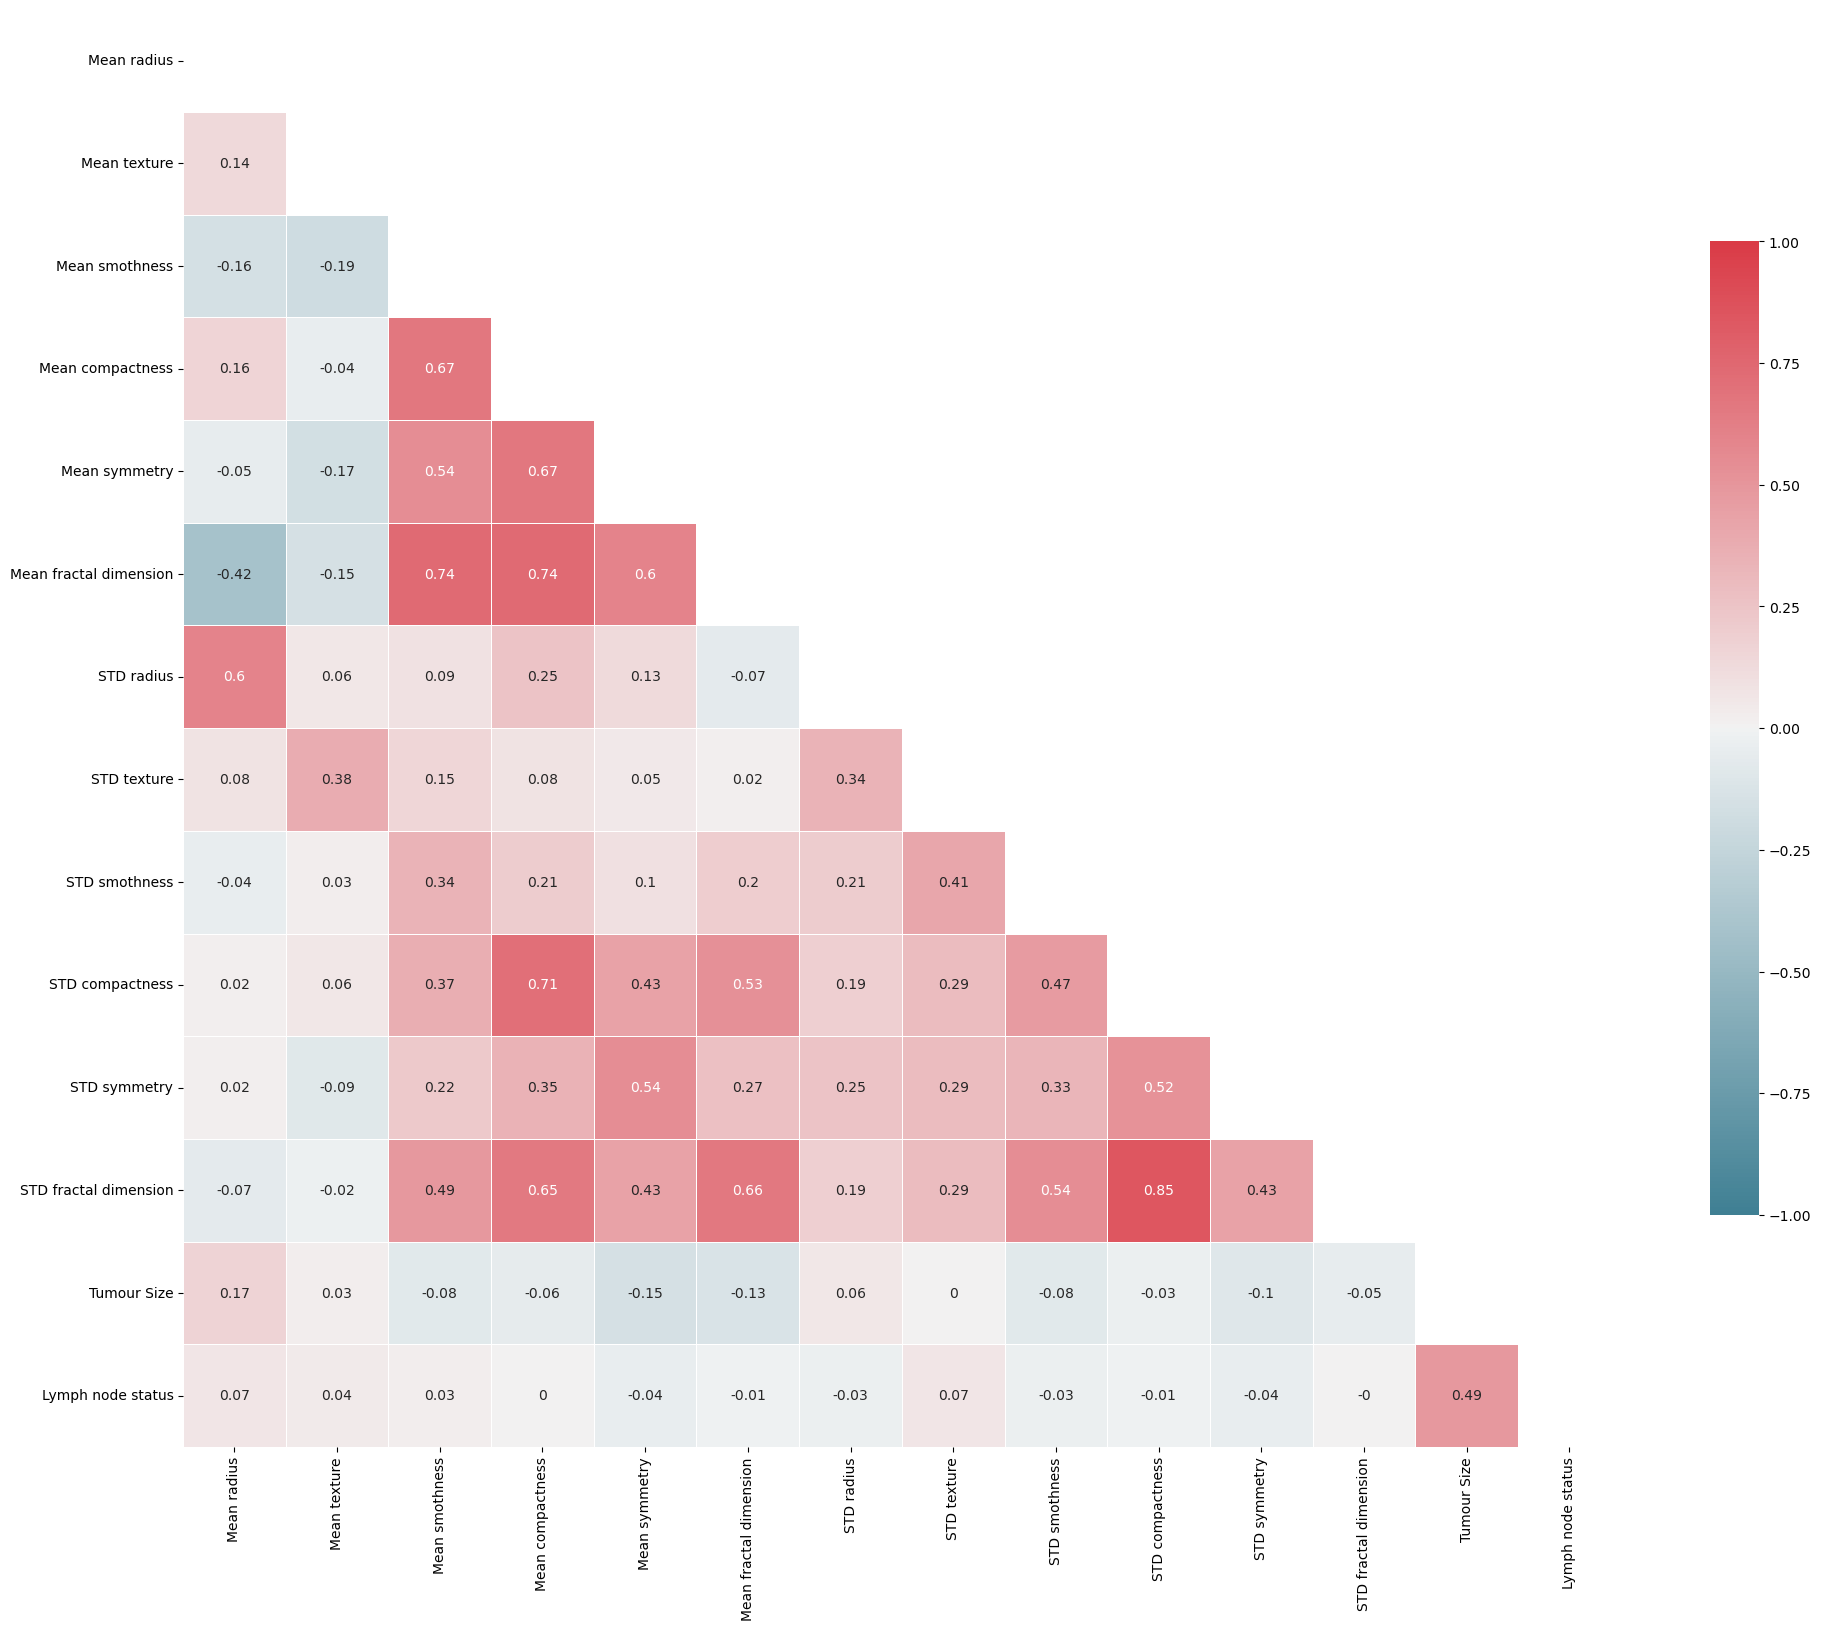

In [15]:
#now we can make correlation matrix again to see the correlation between features we selected
corr = df.drop('Recurrence', axis=1).corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()


**There are no highly correlated features**

In [16]:
#We define X and y
X = df.drop('Recurrence',axis=1)
y = df['Recurrence']
#rename X and y as features and target
features = X
target = y
#print shape of features and target
print(features.shape)
print(target.shape)

(198, 14)
(198,)


In [17]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#print shape of train and test
print(X_train.shape)
print(X_test.shape)

(158, 14)
(40, 14)


In [18]:
#define logistic regression model 
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='newton-cg', penalty='l2', C=0.001, max_iter=1000, random_state=42,  class_weight={0: 2, 1: 5})
logmodel.fit(X_train,y_train)
test_predictions = logmodel.predict(X_test)
train_predictions = logmodel.predict(X_train)

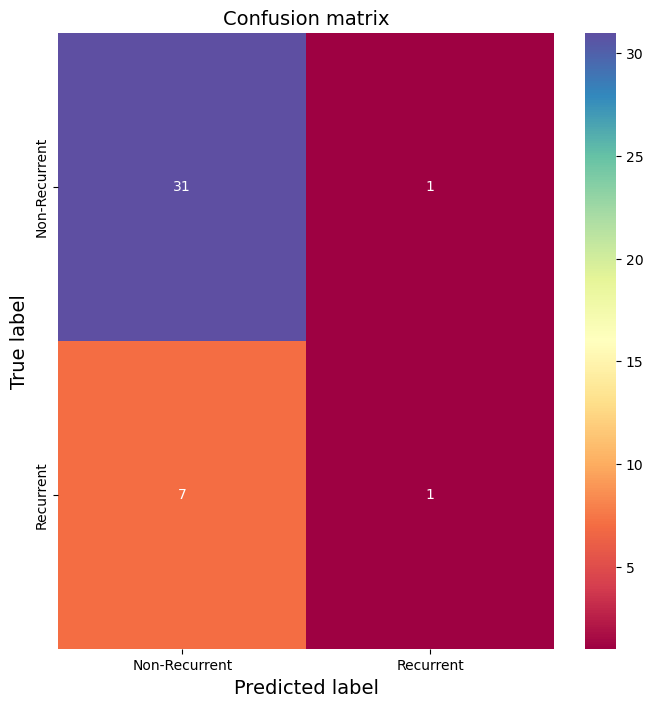

In [19]:
#plot confusion matrix for test data

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral')
plt.title('Confusion matrix', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
#label tick marks
tick_marks = np.arange(2) + 0.5
plt.xticks(tick_marks, ['Non-Recurrent', 'Recurrent'])
plt.yticks(tick_marks, ['Non-Recurrent', 'Recurrent'])

plt.show()


In [20]:
#find optimal value of hyperparameter C
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='newton-cg', penalty='l2', max_iter=100, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(logmodel, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))


Best cross-validation score: 0.75
Best parameters:  {'C': 0.001}
Test set score: 0.80


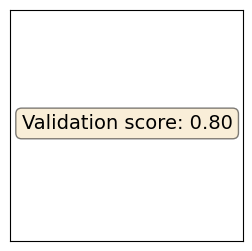

In [49]:
#validation score
val_score = grid.score(X_test, y_test)


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.55, 'Validation score: {:.2f}'.format(val_score), transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.gcf().set_size_inches(3, 3) 

plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()




In [28]:
#calculate accuracy, precision, recall, f1-score for test data and train data and store them in dataframe
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import fbeta_score


#test data
test_score = grid.score(X_test, y_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
test_fbeta = fbeta_score(y_test, test_predictions, beta=0.6)
test_auc = roc_auc_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)
test_cm = confusion_matrix(y_test, test_predictions)
test_cm = pd.DataFrame(test_cm, index=['Non-Recurrent', 'Recurrent'], columns=['Non-Recurrent', 'Recurrent'])

#train data
train_score = grid.score(X_train, y_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_fbeta = fbeta_score(y_train, train_predictions, beta=0.6)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)
train_auc = roc_auc_score(y_train, train_predictions)
train_report = classification_report(y_train, train_predictions)
train_cm = confusion_matrix(y_train, train_predictions)
train_cm = pd.DataFrame(train_cm, index=['Non-Recurrent', 'Recurrent'], columns=['Non-Recurrent', 'Recurrent'])


#store all metrics in dataframe
metrics = pd.DataFrame({ 
                        'Score' : [test_score, train_score],
                        'FBeta score': [test_fbeta, train_fbeta], 
                        'Accuracy': [test_accuracy, train_accuracy],
                        'Precision': [test_precision, train_precision],
                        'Recall': [test_recall, train_recall],
                        'F1': [test_f1, train_f1],
                        'AUC': [test_auc, train_auc]},
                          index=['Test', 'Train'])
metrics



,Score,FBeta score,Accuracy,Precision,Recall,F1,AUC
Test,0.800000,0.278689,0.800000,0.500000,0.125000,0.200000,0.546875
Train,0.753165,0.295139,0.759494,0.555556,0.128205,0.208333,0.547296


In [ ]:
#validation score 
val_score = grid.score(X_test, y_test)

#add fbeta_score
from sklearn.metrics import fbeta_score

train_fbeta = fbeta_score(y_train, train_predictions, beta=0.6)

#test score
test_score = grid.score(X_test, y_test)

#recall score
test_recall = recall_score(y_test, test_predictions)
train_recall = recall_score(y_train, train_predictions)


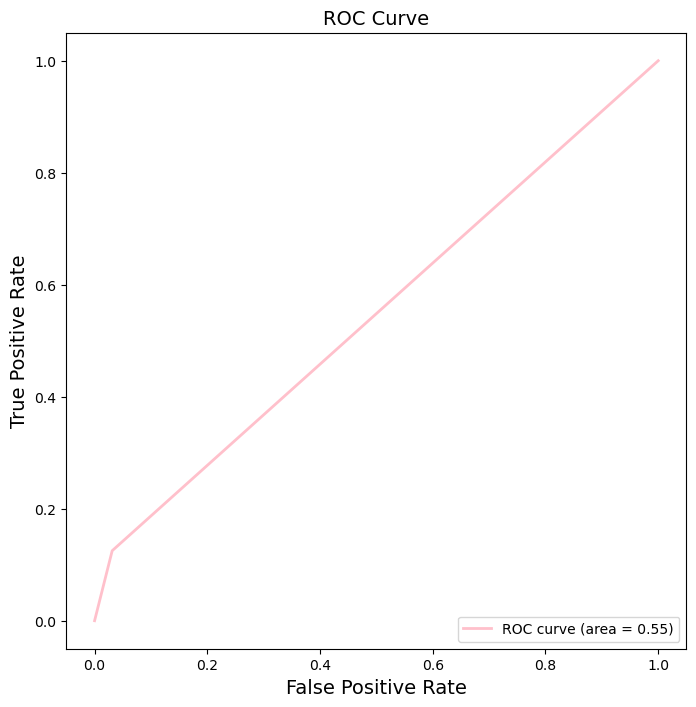

In [22]:
#calculate TPR and FPR for test data
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = auc(fpr, tpr)

#plot ROC curve for test data
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc="lower right")


plt.show()